In [4]:
#importing the dataset 
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [26]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [5]:
digits.images.shape

(1797, 8, 8)

The images dataset is a three-dimensional array with 1797 samples each consisting of an 8 * 8 grid of pixels. 

### Visualizing the first few digits to see how they look

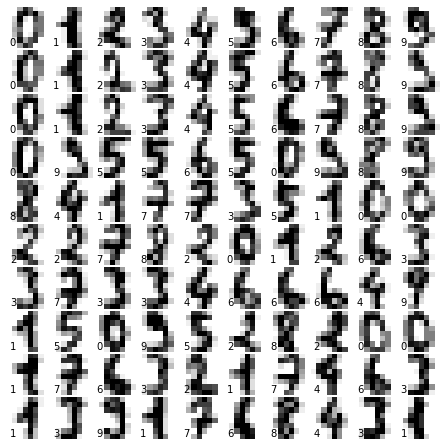

In [55]:
import matplotlib.pyplot as plt

#figure size in inches
fig = plt.figure(figsize = (6,6))

#subplot adjustments
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

#plotting 100 digits in total, where each digit is 8*8=64 pixels
for i in range(100):   
    
    #subplots with 10 rows and 10 columns, one digit at a time with no ticks on both the axes
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    
    #displaying data as image
    #using gray scale as the colour map 
    #scaling small image up using nearest as the interpolation (insertion of something of different nature into something else) method
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    #setting the subplot boundary off
    fig.patch.set_visible(False)
    ax.axis('off')
    
    #labelling all 10 images in a row with the target value and positioning the labels at (0, 7) position
    ax.text(0, 7, str(digits.target[i]))

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 100)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [61]:
y_pred = classifier.predict(X_test)
y_pred

array([9, 9, 0, 2, 4, 5, 7, 4, 7, 2, 4, 5, 7, 5, 9, 6, 1, 1, 5, 2, 8, 7,
       6, 6, 6, 7, 0, 2, 8, 3, 0, 9, 3, 9, 9, 5, 3, 6, 3, 6, 1, 1, 5, 2,
       0, 4, 8, 3, 7, 4, 1, 5, 5, 1, 4, 8, 8, 7, 3, 9, 6, 3, 5, 4, 2, 6,
       3, 6, 6, 6, 8, 4, 6, 0, 6, 6, 2, 1, 0, 3, 1, 3, 3, 1, 1, 4, 0, 5,
       5, 4, 1, 7, 0, 0, 8, 7, 4, 0, 7, 5, 4, 0, 9, 3, 4, 5, 7, 2, 5, 5,
       5, 2, 1, 3, 2, 0, 1, 8, 7, 3, 2, 1, 9, 6, 0, 7, 0, 7, 5, 0, 7, 6,
       0, 2, 8, 2, 0, 7, 6, 3, 4, 5, 0, 3, 9, 0, 8, 0, 3, 6, 8, 1, 4, 1,
       8, 9, 0, 0, 6, 2, 2, 7, 5, 9, 2, 4, 1, 5, 3, 4, 2, 0, 6, 9, 3, 1,
       0, 0, 7, 4, 4, 4, 3, 9, 5, 3, 4, 9, 2, 8, 2, 4, 9, 7, 2, 7, 1, 0,
       1, 3, 8, 6, 3, 9, 0, 3, 1, 5, 3, 8, 0, 6, 8, 6, 2, 9, 9, 2, 6, 2,
       1, 4, 4, 2, 8, 0, 7, 2, 7, 2, 6, 4, 0, 9, 0, 5, 0, 3, 3, 9, 0, 2,
       7, 0, 1, 2, 2, 7, 3, 2, 0, 2, 2, 5, 1, 2, 6, 7, 0, 5, 9, 3, 5, 2,
       2, 6, 4, 7, 9, 4, 0, 9, 4, 8, 7, 0, 9, 1, 0, 7, 1, 6, 0, 5, 9, 9,
       6, 8, 7, 4, 2, 8, 1, 0, 8, 1, 9, 6, 1, 8, 7,